# <center> Practice Case 2: Exploratory Data Analysis (EDA)
## <center> Banking Data System

Here ini this notebook, we would like to do exploratory data analysis of a banking data and give some insight regarding interested customers.

    Author: Tri Juliansyah M Sambas  
    Date: 29th October 2019

## Outline
* Executive Summary
* Import Libraries
* Import Dataset
    - Description
    - Data import & preliminary analysis
* Exploratory Data Analysis
    - Null values analysis
    - Categorical variables analysis
        * Feature Engineering
        * Graphics
    - Numerical variables analysis
        * Correlation
        * Graphics
        * Feature Engineering

## TLDR; Executive Summary

1. **Describe each columns (data types, unique values/range of values, missing values, etc.)**  
In this dataset we have 41176 rows (after 12 entries dropped due to duplication) and 21 columns. Originally, we have 11 categorical and 10 numerical variables in the dataset. Yet, after feature engineering, we can have additional 2 categorical and 8 numerical variables in the dataset. Regarding the missing values, firstly, it was thought that there are no missing values but then after analyzing categorical data, we can assume 'unknown' entries as missing values. We found that two variables have more than 20% missing entries and the rest are less than 5%. A suprising result come from missing values analysis that *more than 80% of recorded customers do not exist in the previous campaign.*  


2. **Is the data fit for analysis? If not, what wrangling steps should be done?**  
For a simple exploratory analysis, the dataset is suitable. However, a lot of feature engineering could be done to expand the possibility of being good predictors for a predictive modeling. Types of feature engineering (wrangling steps) that have been done in this notebook are _Categorical to Numerical (Binary, Ordinal, Nominal) and Numerical to Numerical_. For further further analysis, _more feature engineering could be done such as Numerical to Categorical (binning)_.  


3. **From the data, what can you describe about their sample of customers?**  
The sample is imbalance between the number of subscribed and not subscribed customers. I found that more than 85% of customers do not subsribe the bank term deposit. The sample needs special treatments if we are going to use it as predictors in a predictive modeling. For example, we need to try and compare the performace of model on normal, oversampling of yes, undersampling of no, and bootstrap dataset. Therefore, we could determine whether the sample is good enough or not for predictive modeling. 


4. **Are they potentially “lucrative” customers? If so, how many of them are and why?**  
In my opinion, the question is a little bit difficult to understand or confusing. Since, in this practice case, we are not making a model then we cannot determine customers "lucrativeness". Yet, what I understand from the data is we have several promising predictors to predict whether people are going to subscribe or not. The list of the predictors (8 out of 31 predictors) can be found below,
    - Education
	- Marietal
    - Month
	- Contact
	- Job
	- Poutcome
    - duration
    - previous


5. **What are the difference between customers who are interested in the product and those who don’t?**  
The highest difference can be found on the eight variables mentioned above in which each variable are highly correlated to the customers who decide to subscribe the bank term deposit. Detail analysis can be found throughout the notebook.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import interact

import warnings
warnings.filterwarnings('ignore')

## Import Dataset
### Description

The data is collected from a marketing campaign of a banking institution. The marketing campaigns were done on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Input variables:  
**bank client data:**  
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')  
**related with the last contact of the current campaign:**  
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
**other attributes:**  
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
**social and economic context attributes**  
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)  
**Output variable (desired target):**  
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
bank_df = pd.read_csv('../Data/bank-marketing-full.csv', sep = ';')
print('You have %i rows and %i columns.' %bank_df.shape)

You have 41188 rows and 21 columns.


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Grouping all data types:

In [4]:
bank_df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

Defining **categorical** and **numerical** variables:

In [5]:
categorical = list(bank_df.dtypes[bank_df.dtypes == 'object'].index)
numerical = list(bank_df.dtypes[bank_df.dtypes != 'object'].index)
print('You have %i categorical and %i numerical type of columns.' % (len(categorical),len(numerical)))

You have 11 categorical and 10 numerical type of columns.


Finding **duplicated** entries:

In [6]:
print('In your dataset there are: %i entries are duplicated' %bank_df.duplicated().sum())

In your dataset there are: 12 entries are duplicated


In [7]:
bank_df[bank_df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


**Because** we found 12 entries are duplicated, we need to get rid of it from our analysis to avoid bias.

**Dropping** duplicate entries:

In [8]:
bank_df.drop_duplicates(keep = 'first', inplace = True)
bank_df.reset_index(inplace = True, drop = True)
print('Now, you have %i rows and %i columns.' %bank_df.shape)

Now, you have 41176 rows and 21 columns.


## Exploratory Data Analysis

### Checking null values

In [9]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**No null value is found** in all columns then this data is already clean and ready to be analyzed!

### Categorical Variables
#### Feature Engineering
Feature engineering allow us to analyze the dataset even further. Most of the works here are using categorical to numerical transformation. The transformations allow us to look at the correlation between variables and specifically to our target **'y'**.

In [10]:
categ_len = []
for category in categorical:
    categ_len.append(bank_df[category].value_counts().shape[0])
    
categ_df = pd.DataFrame({'categorical':categorical, 'unique_number': categ_len})
display(categ_df.sort_values(by = 'unique_number'))

,categorical,unique_number
6,contact,2
10,y,2
3,default,3
4,housing,3
5,loan,3
9,poutcome,3
1,marital,4
8,day_of_week,5
2,education,8
7,month,10


#### Binary Transformation
Transforming binary information into 0 and 1. Variables to be transformed:
- y
- contact
- default
- housing
- loan
- poutcome

In [11]:
bank_df['y_num'] = bank_df['y'].apply(lambda x: 1 if x == 'yes' else 0)
bank_df['contact_cell_num'] = bank_df['contact'].apply(lambda x: 1 if x == 'cellular' else 0)

In [12]:
def default_to_num(data):
    if data == 'no':
        return 0
    elif data == 'unknown':
        return None
    elif data == 'yes':
        return 1

In [13]:
bank_df['default_num'] = bank_df['default'].apply(default_to_num)
bank_df['housing_num'] = bank_df['housing'].apply(default_to_num)
bank_df['loan_num'] = bank_df['loan'].apply(default_to_num)

In [14]:
def poutcome_to_num(data):
    if data == 'nonexistent':
        return None
    elif data == 'failure':
        return 0
    elif data == 'success':
        return 1

In [15]:
bank_df['poutcome_num'] = bank_df['poutcome'].apply(poutcome_to_num)

#### Ordinal Transformation

Transforming an ordered categorical type of variable. Variables to be transformed:
- education
- marital
- job

Variables are not changed:
- day_of_week
- month

In [16]:
def education_to_num(data):
    if data == 'unknown':
        return None
    elif data == 'illiterate':
        return 0
    elif data == 'basic.4y':
        return 1
    elif data == 'basic.6y':
        return 2
    elif data == 'basic.9y':
        return 3
    elif data == 'high.school':
        return 4
    elif data == 'university.degree':
        return 5
    elif data == 'professional.course':
        return 6

In [17]:
bank_df['education_num'] = bank_df['education'].apply(education_to_num)

#### Nominal Variables

Analyzing an un-ordered list of categorical variable.

In [18]:
bank_df['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

**Unknown** entries are treated as **null values**. The transformation is happening below:

In [19]:
bank_df['marital_new'] = bank_df['marital'].apply(lambda x: x if x != 'unknown' else None)
bank_df['marital_new'].value_counts()

married     24921
single      11564
divorced     4611
Name: marital_new, dtype: int64

In [20]:
bank_df['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

**Unknown** entries are treated as **null values**. The transformation is happening below:

In [21]:
bank_df['job_new'] = bank_df['job'].apply(lambda x: x if x != 'unknown' else None)
bank_df['job_new'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job_new, dtype: int64

In [22]:
bank_df['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [23]:
bank_df['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

#### Plotting Graph

Creating **visualizations** out of engineered variables. **Bars** represent the number of customers and the **red line** represent the proportion of subscribed customers.

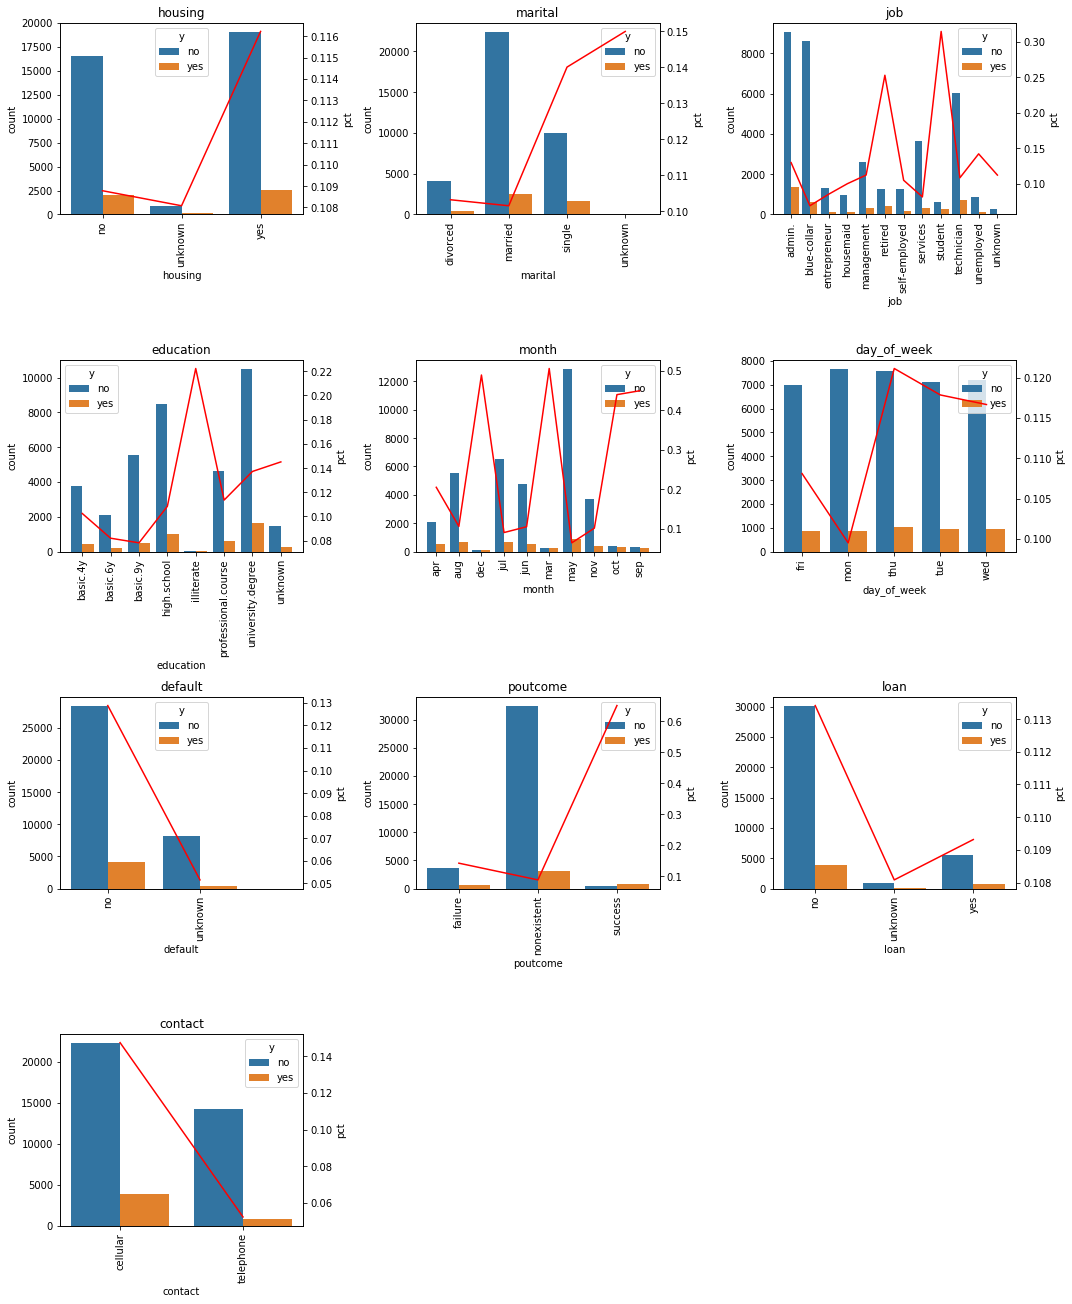

In [24]:
plots_column = 3
plots_row = len(categorical)
counter = 1
plt.figure(figsize = (15,50))
for cat in list(set(categorical) - set('y')):
    dummy = bank_df.groupby(by = [cat,'y']).size().reset_index()
    dummy = dummy.merge(bank_df.groupby(by = cat).size().reset_index(), how = 'left', on = cat)
    dummy['pct'] = dummy['0_x']/dummy['0_y']
    dummy.sort_values(by = cat, inplace = True)
    
    plt.subplot(plots_row,plots_column,counter)
    plt.title(cat)
    ax = sns.countplot(x = cat, data = bank_df.sort_values(by = cat), hue = 'y')
    plt.xticks(rotation = 90)
    ax.twinx()
    ax1 = sns.lineplot(x = cat, y = 'pct', data = dummy[dummy['y'] == 'yes'], color = 'red')
    plt.xticks(rotation = 90)
    counter += 1
    del dummy
plt.tight_layout()

Looking at the all bar plots above, the interesting ones are variables with high variance in percentage. This means that **the certain variable(s) could distinguish the customers whether they are interested or not interested** in subscribing the bank term deposit. In this analysis, my assumption is looking at variables which have **minimum difference _0.05_ from the lowest until the highest**. Therefore, from this categorical data, there are several analysis can be made:
1. **Education**: from customer's education perspective, most of customers, who subscribed to the bank term deposit, are **illiterate** _(about 20% of them have bank term deposit)_. Even though the number of customers, who have **university degree**, are the biggest portion of all the customers, there are only about _14% of who have subscribed bank term deposit_.
2. **Job**: from customer's job perspective, **retired** and **student** are most likely to subscribe the bank term deposit _(about 25% and 30% of them have subscribed, respectively)_.
3. **Marital**: customers, who are **single**, are more likely _(about 14% of them)_ to apply for the bank term deposit compared to the rest of categories (**married** _about 10% of them_).
4. **Contact**: the success rate of offering through customer's **cellular** is higher than their **telephone**.
5. **Month**: on **March, October, and December**, the bank have a higher chance to acquire customer while on **May**, there are less people wo apply for the bank term deposit.
6. **Poutcome**: Customers, who **already have bank term deposit previously**, have a higher chance to make a deposit again on the bank.

#### Detailed Analysis (BETA)
- **There are still problem with arranging the order of x-axis**. Correct plots can be found above.
- **Found** problem is the order of xticks is different one and another which cause inaccurate ticks for default rate

In [25]:
@interact
def interactive_analysis(cat = list(set(categorical) - set(['y']))):
    # data preparation
    dummy = bank_df.groupby(by = [cat,'y']).size().reset_index()
    dummy = dummy.merge(bank_df.groupby(by = cat).size().reset_index(), how = 'left', on = cat)
    dummy['pct'] = dummy['0_x']/dummy['0_y']
    dummy.sort_values(by = '0_y', inplace = True)

    # data plotting
    plt.figure(figsize = (7,7))
    plt.title(cat)
    ax = sns.barplot(x = cat, y = '0_x', data = dummy, hue = 'y')
    plt.ylabel('Frequency')
    plt.xticks(rotation = 90)
    ax2 = ax.twinx()
    sns.lineplot(x = cat, y = 'pct', data = dummy[dummy['y'] == 'yes'], color = 'red')
    plt.xticks(rotation = 90)
    plt.show()

interactive(children=(Dropdown(description='cat', options=('housing', 'marital', 'job', 'education', 'month', …

#### Pie Chart
More than 85% of customers do not subsribe the bank term deposit.

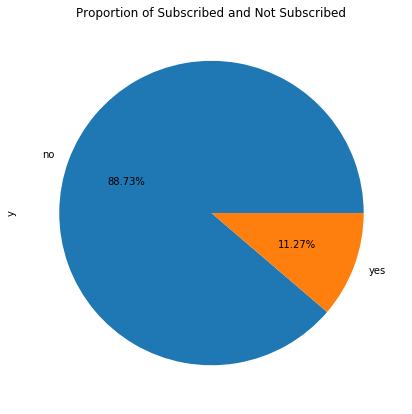

In [26]:
plt.figure(figsize = (7,7))
plt.title('Proportion of Subscribed and Not Subscribed')
bank_df['y'].value_counts().plot.pie(autopct = '%.2f%%')
plt.show()

### Null Values Analysis (Revisited)
Since I found there are several entries on column **(poutcome, default, education, loan, housing, job, and marital)** with _'unknown'_, I assume that this entry means null value. Therefore, we need to revisit the null values analysis and found that more than **80% customers are not found/contacted in the previous campaign**. Then there are **20% customers default data** are not found and the rest variables have less than **5% missing values**.

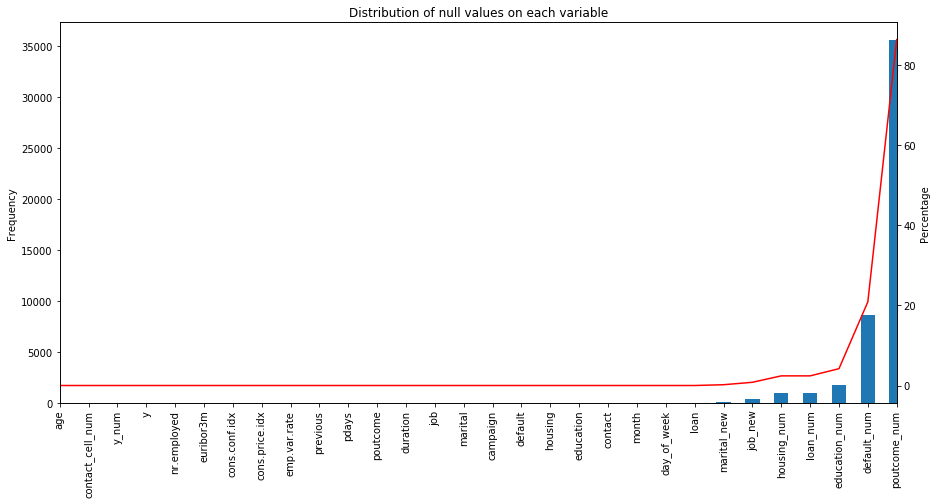

In [27]:
plt.figure(figsize = (15,7))
plt.title('Distribution of null values on each variable')
ax = bank_df.isnull().sum().sort_values().plot.bar()
ax.set_ylabel('Frequency')
ax.twinx()
ax1 = (bank_df.isnull().sum()/bank_df.isnull().count()*100).sort_values().plot.line(color = 'red')
ax1.set_ylabel('Percentage')
plt.show()

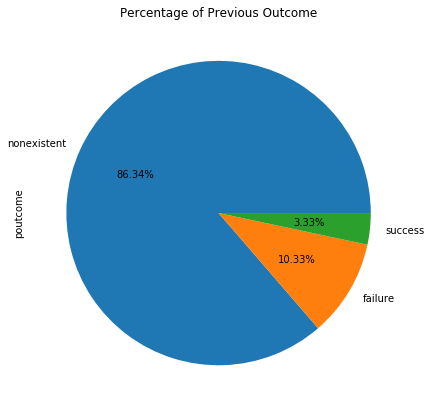

In [28]:
plt.figure(figsize = (7,7))
plt.title('Percentage of Previous Outcome')
bank_df['poutcome'].value_counts().plot.pie(autopct = '%.2f%%')
plt.show()

A surprising result that **more than 80% of recorded customers do not exist in the previous campaign.**

### Numerical Variables
- Statictics Descriptive
- Correlation Map
- Correlation to 'Target'
- Distribution Plot
- Box Plot

**Statistics descriptive** of dataset:

In [29]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num,contact_cell_num,default_num,housing_num,loan_num,poutcome_num,education_num
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,32580.000000,40186.000000,40186.000000,5625.000000,39446.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663,0.634714,0.000092,0.536779,0.155477,0.244089,3.985220
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184,0.481516,0.009596,0.498652,0.362363,0.429584,1.478252
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


#### Correlation Map
Standard analysis to find the variables that are correlated to each other.

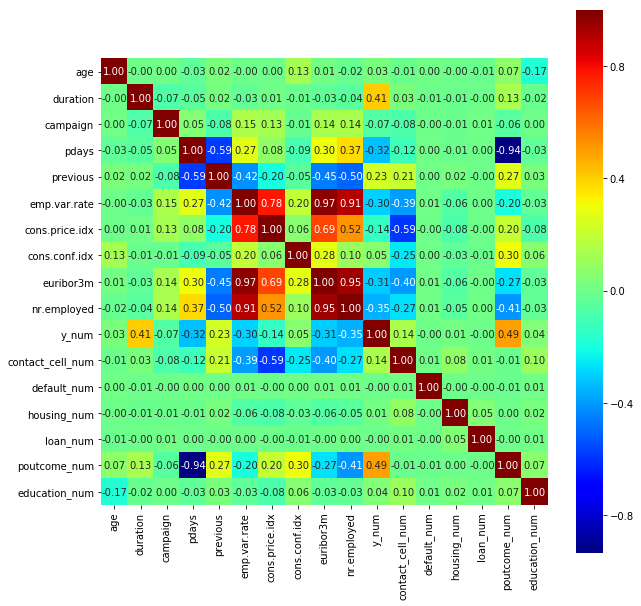

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(bank_df.corr(), annot = True, square = True, fmt = '0.2f', cmap = 'jet')
plt.show()

#### Correlation to Target
Plot of correlation coefficient which is related to the target. **Higher correlation (let it be positive or negative)** could lead to **better prediction** in a predictive modeling.

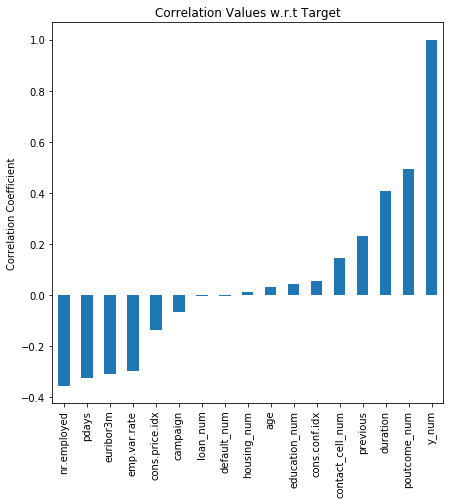

In [31]:
plt.figure(figsize = (7,7))
plt.title('Correlation Values w.r.t Target')
bank_df.corr()['y_num'].sort_values().plot.bar()
plt.ylabel('Correlation Coefficient')
plt.show()

Defining numerical variables **sorted by correlation** to the target:

In [32]:
numer_sort = list(bank_df.corr()['y_num'].sort_values()[:-1].index)
numer_sort_values = list(bank_df.corr()['y_num'].sort_values()[:-1].values)
numer_sort_values = [round(x,3) for x in numer_sort_values]

#### Distribution Plot

Plotting the histogram of all possible numerical variables in the dataset whether it is **originially numerical** or **engineered**. The plots have been **sorted by its correlation** to the **target values (subscribe or not)**. As the correlation is **increasing (to the positive values)**, the color gradient is getting **darker**.

<span style="color:blue"> **(HIGH) Negatively correlated**</span> (high values tend to found less subscribers):
- nr.employed
- pdays
- euribor3m
- emp.var.rate
- cons.price.idx

<span style="color:red"> **(HIGH) Positively correlated** </span> (high values tend to found more subscribers):
- poutcome_num (feature engineered from poutcome)
- duration
- previous
- contact_cell_num (feature engineered from contact)

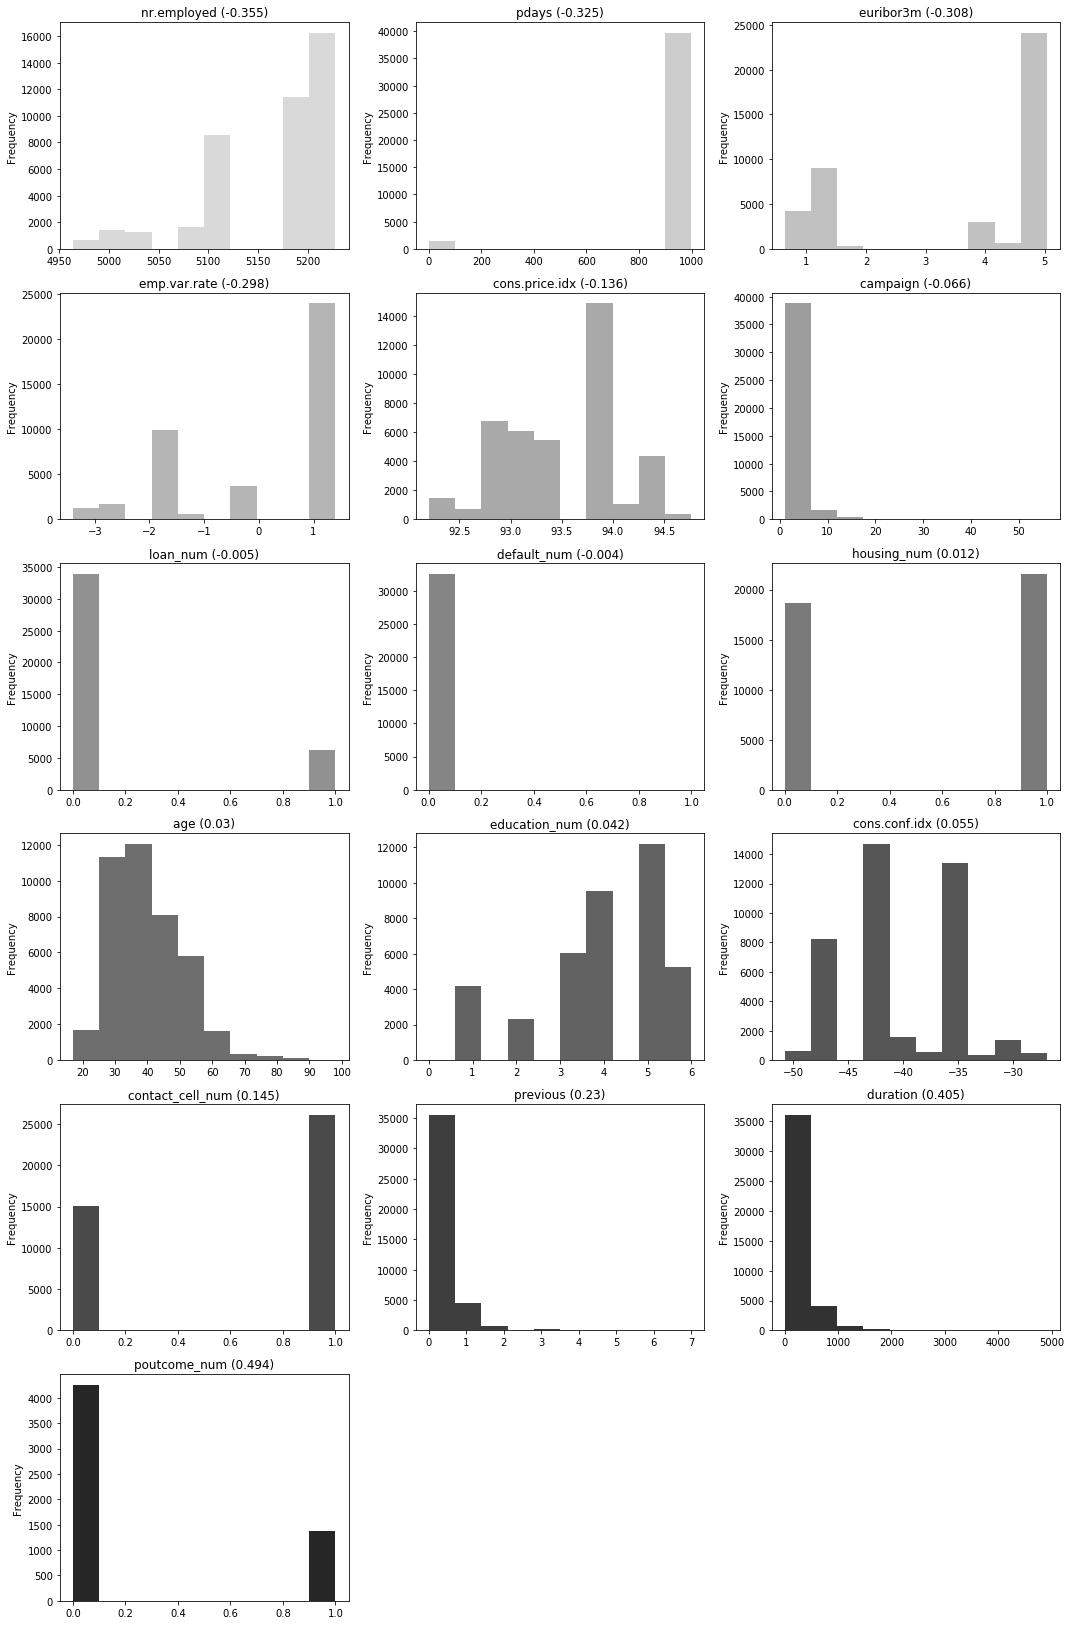

In [33]:
colors = np.linspace(0.15,0.85,len(numer_sort))[::-1]
plots_column = 3
plots_row = len(numer_sort)
counter = 1
plt.figure(figsize = (15,60))
for num,corr in zip(numer_sort,numer_sort_values):
    plt.subplot(plots_row,plots_column,counter)
    plt.title(num + ' (' + str(corr) + ')')
    bank_df[num].plot.hist(color = str(colors[counter - 1]))
    counter += 1
plt.tight_layout()

#### KDE plot

Additional analysis after the histograms. KDE plots show **the probability density** of each variable, which also filtered based on target (in this case). The plots (right-hand side) will show the strength of each variable if they are going to be included as predictors in a predictive model. The **high correlated variables (with the target)** will quickly show the density separation of 0 (not subscribed) and 1 (subscribed) values. **More separated** the density of the variables, the **more highly correlated** to the target.

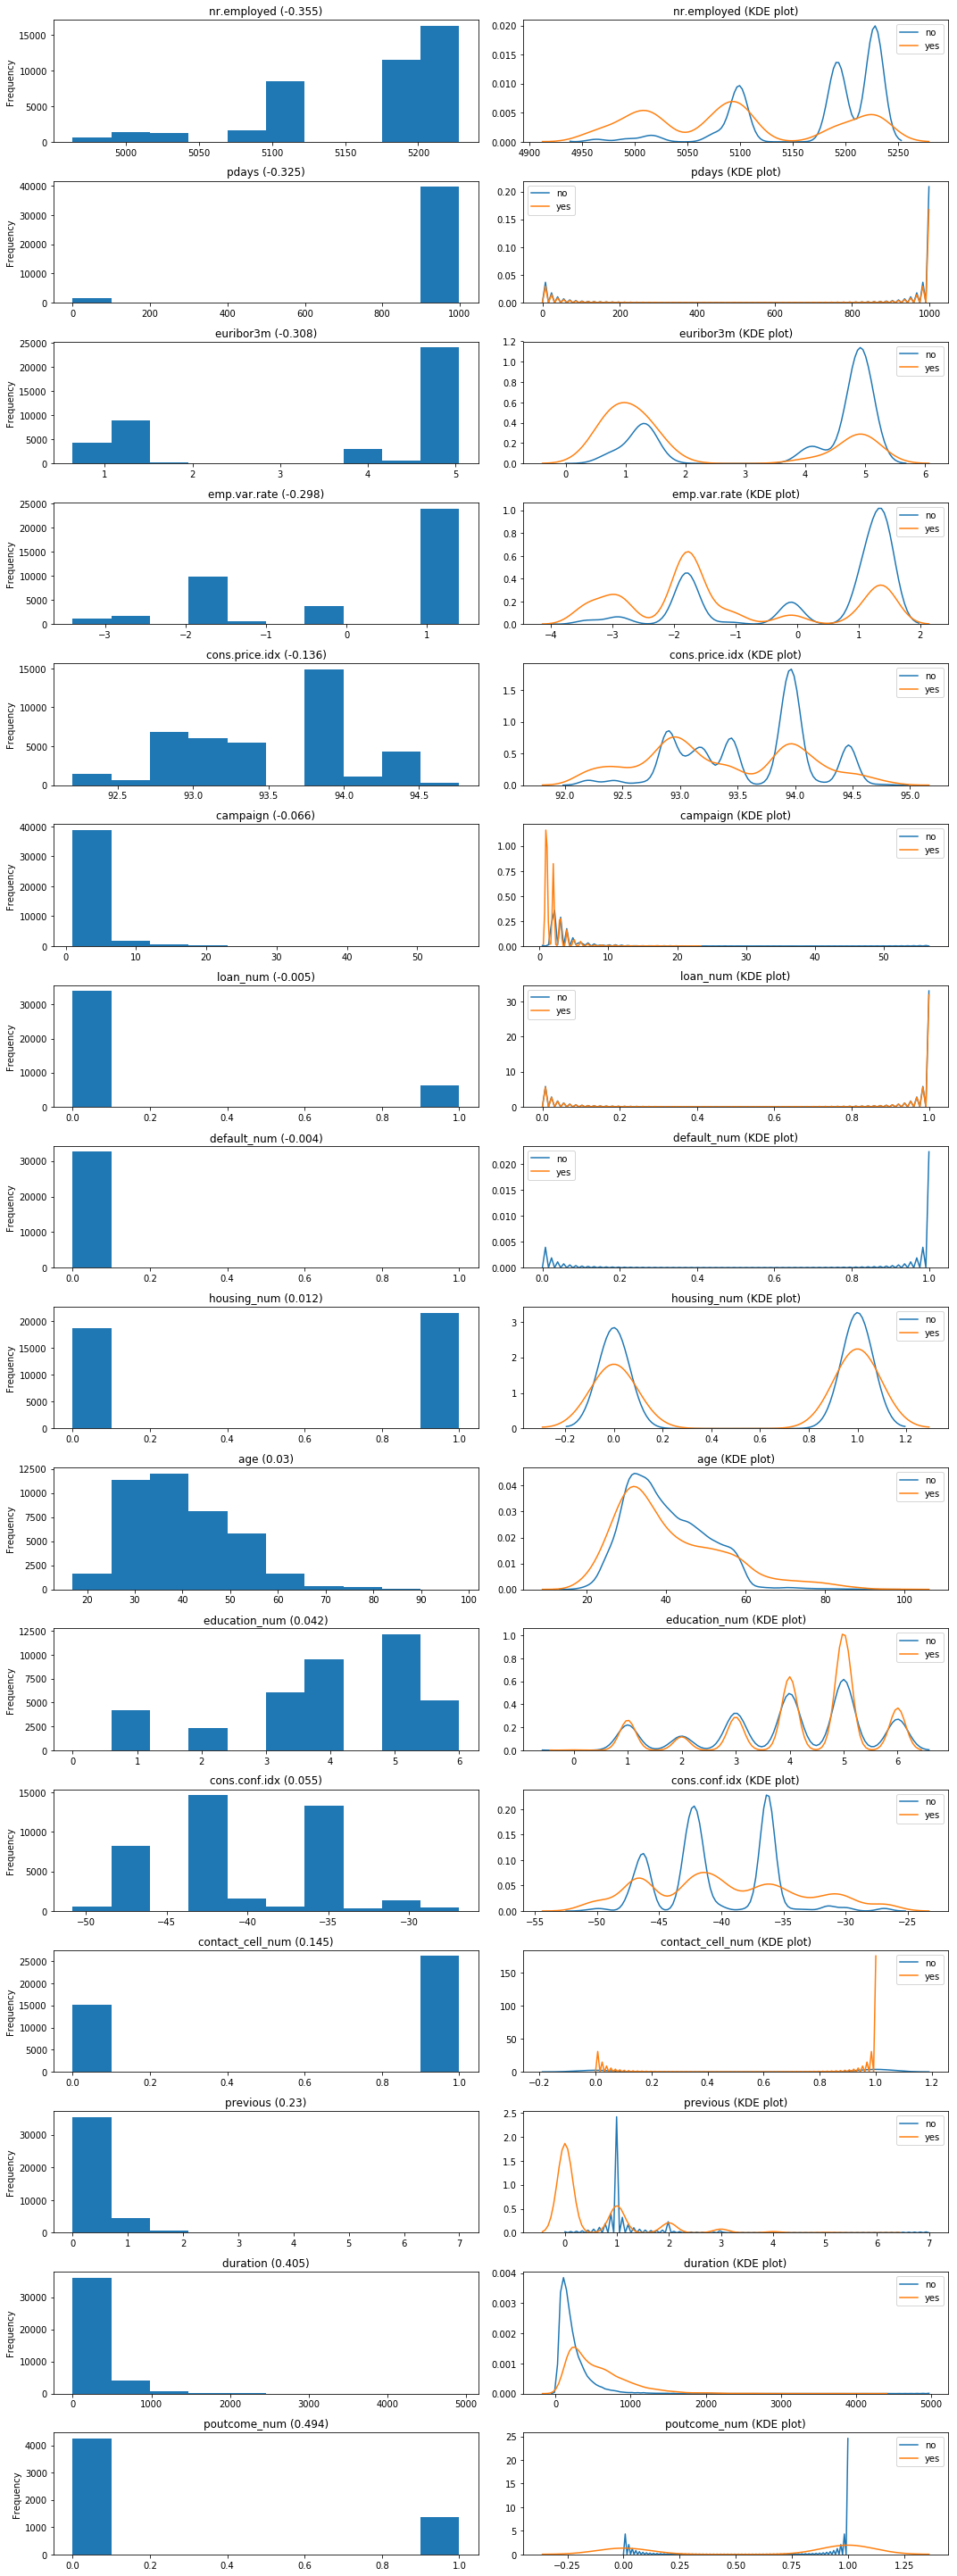

In [34]:
plots_column = 2
plots_row = len(numer_sort)*2
counter = 1
plt.figure(figsize = (15,80))
for num,corr in zip(numer_sort,numer_sort_values):
    plt.subplot(plots_row,plots_column,counter)
    plt.title(num + ' (' + str(corr) + ')')
    bank_df[num].plot.hist()
    counter += 1
    
    plt.subplot(plots_row,plots_column,counter)
    plt.title(num + ' (KDE plot)')
    sns.kdeplot(bank_df.loc[bank_df['y'] == 'no',num])
    sns.kdeplot(bank_df.loc[bank_df['y'] == 'yes',num])
    plt.legend(labels = ['no','yes'])
    counter += 1

plt.tight_layout()

#### Box Plot
We can use this analysis to find some outliers in the dataset. From the figures below, I found variables which have outliers, those are:
- pdays (need to be featured engineered)
- campaign
- loan_num (probably because binary type of variable, can be neglected)
- default_num (probably because binary type of variable, can be neglected)
- age
- education_num
- cons.conf.idx
- previous
- duration
- poutcome_num (probably because binary type of variable, can be neglected)

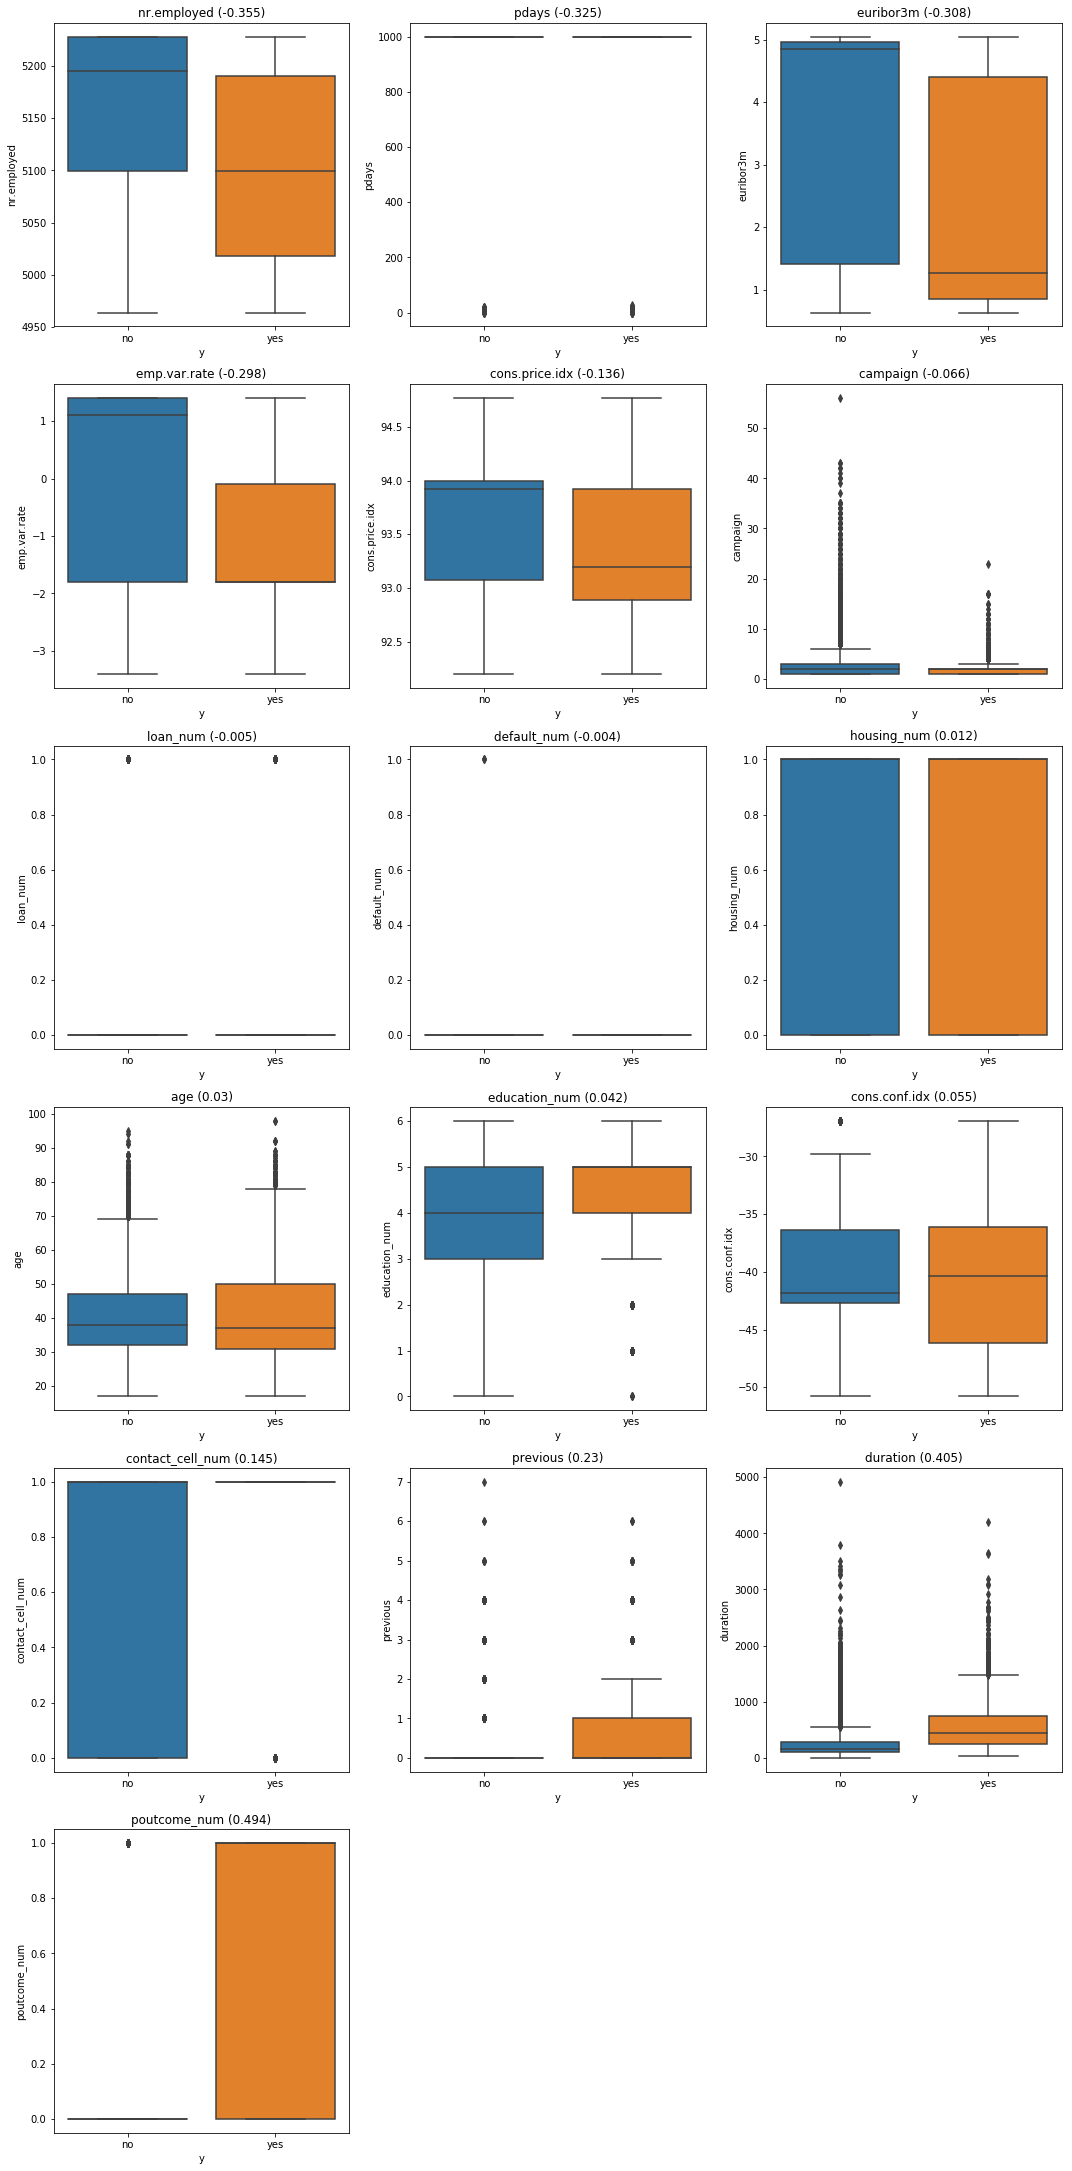

In [35]:
plots_column = 3
plots_row = len(numer_sort)
counter = 1
plt.figure(figsize = (15,80))
for num,corr in zip(numer_sort,numer_sort_values):
    plt.subplot(plots_row,plots_column,counter)
    plt.title(num + ' (' + str(corr) + ')')
    sns.boxplot(x = 'y', y = num, data = bank_df)
    counter += 1
plt.tight_layout()

The interesting part of this analysis is about **previous** variable in which the high number of calls do not appear to be a key to acquire customers. On the contrary, the customers, who are already interested, will only need to be called once or twice until they agree to apply for the bank term deposit.

#### Feature Engineering
Doing a feature engineering on **pdays** variable which means the number of days from previously contacted on the last campaign. An interesting result appears in which the **decision time** of the customers to determine whether they will subscribe or do not subscribe is quite fast. It is mostly about **five days**.

In [36]:
bank_df['pdays_new'] = bank_df['pdays'].apply(lambda x: x if x != 999 else None)

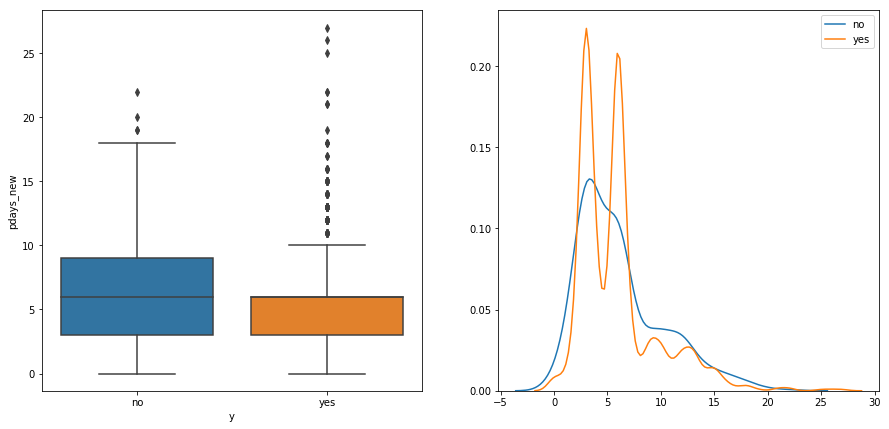

In [37]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x = 'y', y = 'pdays_new', data = bank_df)

plt.subplot(1,2,2)
sns.kdeplot(bank_df.loc[bank_df['y'] == 'no','pdays_new'])
sns.kdeplot(bank_df.loc[bank_df['y'] == 'yes','pdays_new'])
plt.legend(labels = ['no', 'yes'])
plt.show()

In [38]:
print('Your final shape is %i rows and %i columns' %bank_df.shape)

Your final shape is 41176 rows and 31 columns


In [39]:
bank_df.dtypes.value_counts()

object     13
float64    11
int64       7
dtype: int64